In [1]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mercury as mr
import datetime as dt

import re
from string import punctuation as punct
import warnings
warnings.filterwarnings('ignore')

In [2]:
show_code = mr.Checkbox(label="Show code", value=False)

mercury.Checkbox

In [3]:
app = mr.App(title="Analysis for analysts",description="Data analysis relating to the skills a Data Analyst needs.", show_code=show_code.value)

mercury.App

In [4]:
lvl = mr.MultiSelect(value=['Junior'],choices=['Junior','Mid','Senior'], label="Choose youre level")

mercury.MultiSelect

# Analytical skills 📊
#### Nowadays, it is becoming increasingly difficult to find a first job as a data analyst, so we have prepared an analysis of the most useful skills to help you land your dream job. 

## What you will finde here:

- Salaries for 10 most popular Data Analytics skills
- Number of jobs required
- What company is looking for the most employees
- Where company is looking for the most employees
- Where you can finde the most offert in internet
- What are the working hours
- How many offers have remote work
- Most needed skills

In [5]:
df = pd.read_csv("gsearch_jobs.csv")
df = df.drop(columns=["Unnamed: 0", "index"])

# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)

# Format dates
df.date_time = pd.to_datetime(df.date_time)
df.insert(14, "time_ago", df.date_time.apply(lambda x: dt.datetime.today() - x))

In [6]:
# słowa kluczowe dla kategorii
junior_keywords = ['junior', 'entry level', 'intern', 'apprentice','jr','I']
mid_keywords = ['mid-level', 'mid level', 'midlevel','mid', 'II','consultant', 'intermediate', 'experienced','associate','practitioner']
senior_keywords = ['senior', 'lead', 'principal', 'sr', 'III', 'IV', 'senior level','advanced','senior associate', 'expert']

In [7]:
# funkcja do przyporządkowania oferty do kategorii
def categorize_job(row):
    title = row['title'].lower()
    description = row['description'].lower()
    for keyword in junior_keywords:
        if keyword in title or keyword in description:
            return 'Junior'
    for keyword in mid_keywords:
        if keyword in title or keyword in description:
            return 'Mid'
    for keyword in senior_keywords:
        if keyword in title or keyword in description:
            return 'Senior'
    return 'unknown'

# dodanie kolumny z kategorią
df['category'] = df.apply(categorize_job, axis=1)

In [8]:
df = df.drop(df[df['category'] == 'unknown'].index)

In [9]:
df_lvl = df[df.category.isin(lvl.value)]

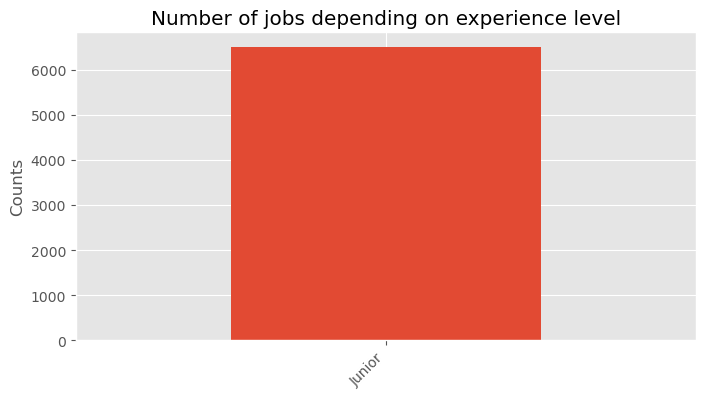

In [40]:
plt.figure(figsize=(8,4))
plt.style.use('ggplot')

level = df_lvl['category'].value_counts().nlargest(10).sort_values(ascending=False)
level.plot(kind='bar')

plt.title("Number of jobs depending on experience level")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Where to look?

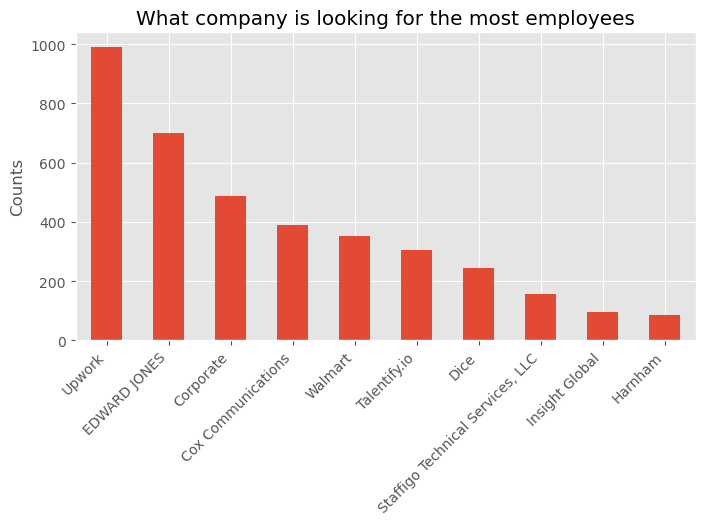

In [11]:
plt.figure(figsize=(8,4))
counts = df['company_name'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("What company is looking for the most employees")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

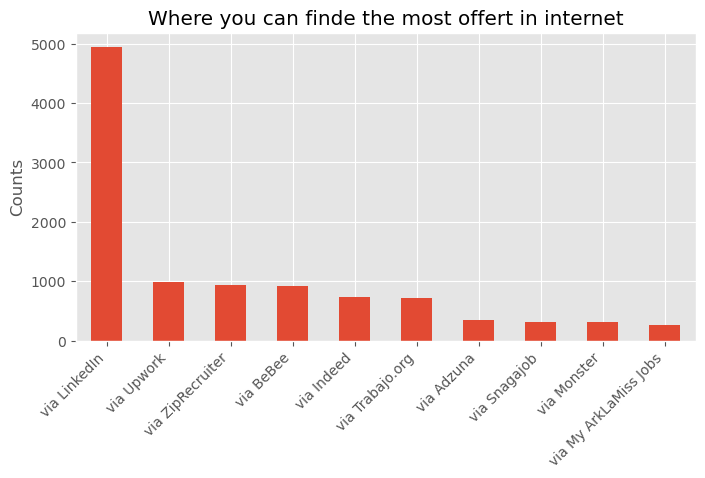

In [12]:
plt.figure(figsize=(8,4))
counts = df['via'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("Where you can finde the most offert in internet")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Work type

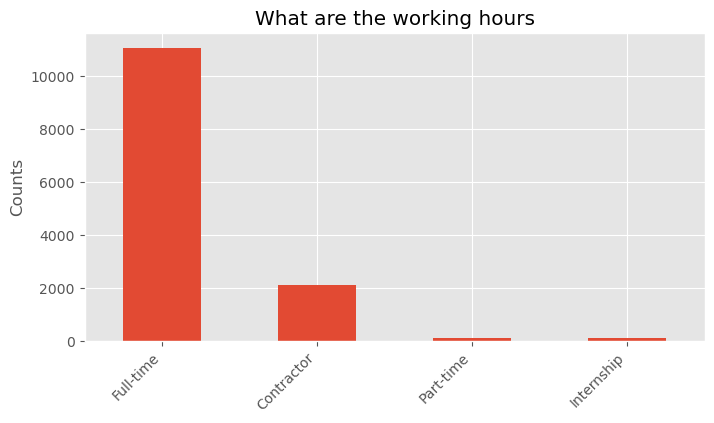

In [13]:
plt.figure(figsize=(8,4))
counts = df['schedule_type'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("What are the working hours")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

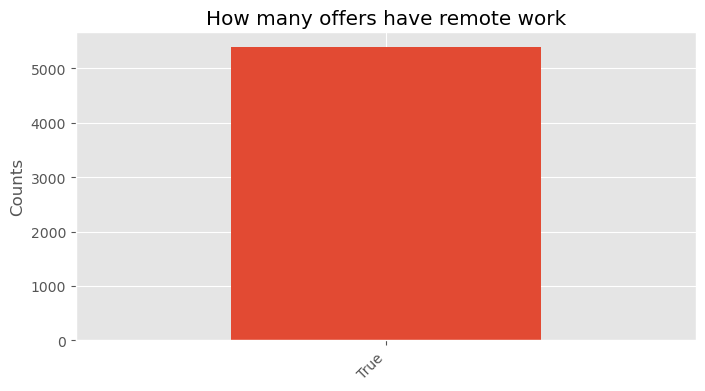

In [14]:
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
counts = df['work_from_home'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.title("How many offers have remote work")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [15]:
#Most valible skill
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [16]:
keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools

In [17]:
jobs_all = df[df.description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10)

In [18]:
keyword_counts = {keyword: 0 for keyword in keywords}

for description in jobs_all['description']:
    words = description.lower().split()
    for keyword in keywords:
        if keyword in words:
            keyword_counts[keyword] += 1

In [19]:
#  keyword_counts

In [20]:
# sort keywords by number of occurrences
sorted_counts = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

In [21]:
# extract the 10 most common keywords
top_keywords = sorted_counts[:10]

## Skills & payments

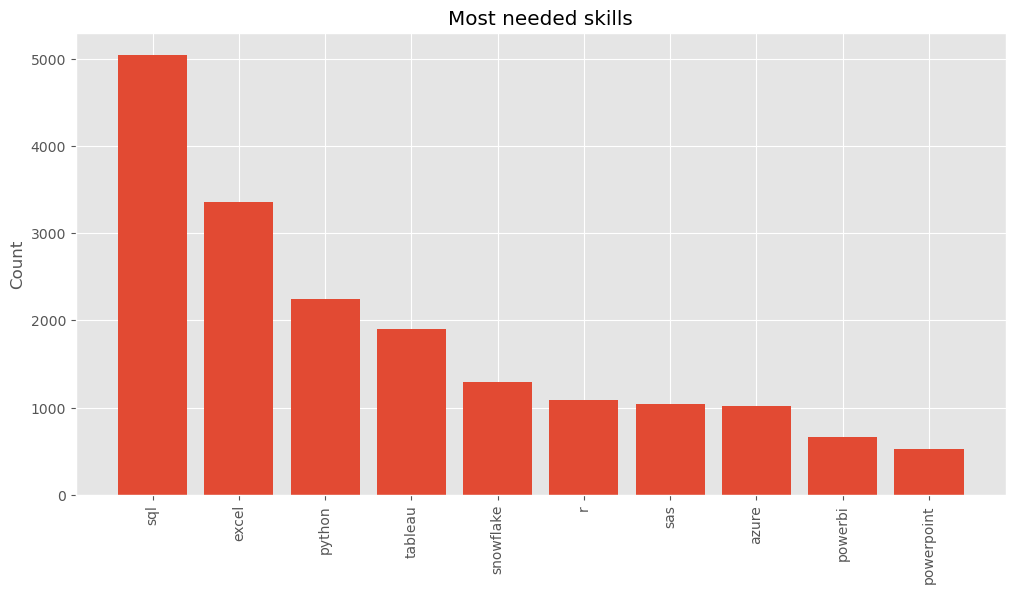

In [22]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.bar(range(len(top_keywords)), [x[1] for x in top_keywords])
plt.xticks(range(len(top_keywords)), [x[0] for x in top_keywords], rotation=90)
plt.title('Most needed skills')
plt.ylabel('Count')
plt.show()

In [25]:
skills = []

for val in df.description_tokens.values:
    skills.extend(val)
skills, counts = np.unique(skills, return_counts=True)
skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])
skills = list(map(lambda x: x[0], skill_count))
counts = list(map(lambda x: x[1], skill_count))
salaries = []
for skill in skills: 
    salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].salary_standardized.fillna(0).mean())
skills_df = pd.DataFrame({"skill": list(skills), "number_of_postings": counts, "avg_salary": map(round, salaries)})
skills_df = skills_df.sort_values("avg_salary", ascending=False)


In [43]:
sk_set = mr.MultiSelect(choices=['sql', 'python','snowflake', 'r', 'powerbi','excel','c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust','ruby','word','tableau','sas'], label="Choose your skills", value=['sql', 'python', 'r', 'snowflake'])

mercury.MultiSelect

In [37]:
# skills_df

In [44]:
sk_df = skills_df[skills_df.skill.isin(sk_set.value)]

In [32]:
#sk_df

Text(0.5, 1.0, 'Average Salaries by Skills')

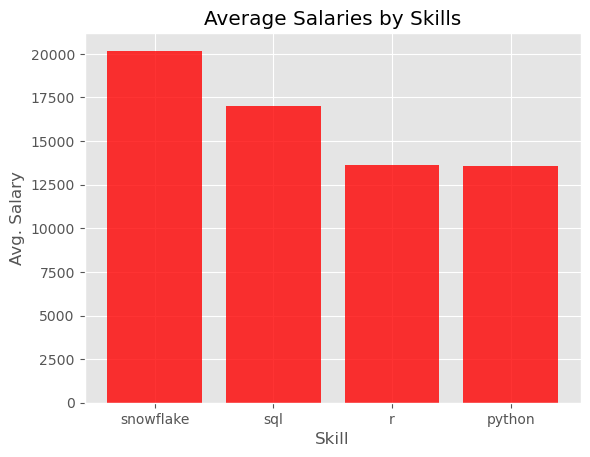

In [45]:
fig, ax = plt.subplots()
ax.bar(sk_df['skill'], sk_df['avg_salary'], color='red', alpha=0.8)

ax.set_xlabel('Skill')
ax.set_ylabel('Avg. Salary')
ax.set_title('Average Salaries by Skills')